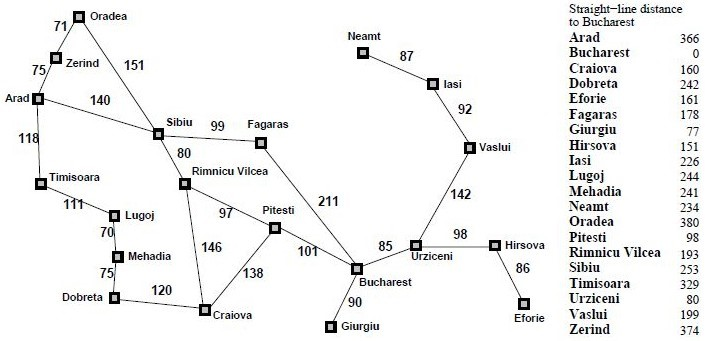

In [9]:
from IPython.display import Image
Image(filename='Arad.jpg')

In [10]:
graph = {
    'Arad': {'Zerind': 75, 'Timisoara': 118, 'Sibiu': 140},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Fagaras': {'Sibiu': 99, 'Bucarest': 211},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucarest': 101},
    'Bucarest': {'Fagaras': 211, 'Pitesti': 101}
}

In [11]:
def bfs(graph, start, goal):
    queue = [[start]]
    visited = set()
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        
        if node == goal:
            return path
        
        if node not in visited:
            visited.add(node)
            for neighbor, distance in graph[node].items():
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
    
    return None

In [12]:
def dfs(graph, start, goal):
    stack = [[start]]
    visited = set()
    
    while stack:
        path = stack.pop()
        node = path[-1]
        
        if node == goal:
            return path
        
        if node not in visited:
            visited.add(node)
            for neighbor, distance in graph[node].items():
                new_path = list(path)
                new_path.append(neighbor)
                stack.append(new_path)
    
    return None

In [13]:
route_bfs = bfs(graph, 'Arad', 'Bucarest')
if route_bfs is not None:
    print('Rute dari Arad ke Bucarest menggunakan BFS:', ' -> '.join(route_bfs))
else:
    print('Tidak ada rute yang ditemukan.')

Rute dari Arad ke Bucarest menggunakan BFS: Arad -> Sibiu -> Fagaras -> Bucarest


In [14]:
route_dfs = dfs(graph, 'Arad', 'Bucarest')
if route_dfs is not None:
    print('Rute dari Arad ke Bucarest menggunakan DFS:', ' -> '.join(route_dfs))

Rute dari Arad ke Bucarest menggunakan DFS: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucarest


In [ ]:
class Node:
    def __init__(self,data,level,fval):
        """ Initialize the node with the data, level of the node and the calculated fvalue """
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        """ Generate child nodes from the given node by moving the blank space
            either in the four directions {up,down,left,right} """
        x,y = self.find(self.data,'_')
        """ val_list contains position values for moving the blank space in either of
            the 4 directions [up,down,left,right] respectively. """
        val_list = [[x,y-1],[x,y+1],[x-1,y],[x+1,y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data,x,y,i[0],i[1])
            if child is not None:
                child_node = Node(child,self.level+1,0)
                children.append(child_node)
        return children
        
    def shuffle(self,puz,x1,y1,x2,y2):
        """ Move the blank space in the given direction and if the position value are out
            of limits the return None """
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = []
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None
            

    def copy(self,root):
        """ Copy function to create a similar matrix of the given node"""
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp    
            
    def find(self,puz,x):
        """ Specifically used to find the position of the blank space """
        for i in range(0,len(self.data)):
            for j in range(0,len(self.data)):
                if puz[i][j] == x:
                    return i,j


class Puzzle:
    def __init__(self,size):
        """ Initialize the puzzle size by the specified size,open and closed lists to empty """
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        """ Accepts the puzzle from the user """
        puz = []
        for i in range(0,self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self,start,goal):
        """ Heuristic Function to calculate hueristic value f(x) = h(x) + g(x) """
        return self.h(start.data,goal)+start.level

    def h(self,start,goal):
        """ Calculates the different between the given puzzles """
        temp = 0
        for i in range(0,self.n):
            for j in range(0,self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp
        

    def process(self):
        """ Accept Start and Goal Puzzle state"""
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")        
        goal = self.accept()

        start = Node(start,0,0)
        start.fval = self.f(start,goal)
        """ Put the start node in the open list"""
        self.open.append(start)
        print("\n\n")
        while True:
            cur = self.open[0]
            print("")
            print("  | ")
            print("  | ")
            print(" \\\'/ \n")
            for i in cur.data:
                for j in i:
                    print(j,end=" ")
                print("")
            """ If the difference between current and goal node is 0 we have reached the goal node"""
            if(self.h(cur.data,goal) == 0):
                break
            for i in cur.generate_child():
                i.fval = self.f(i,goal)
                self.open.append(i)
            self.closed.append(cur)
            del self.open[0]

            """ sort the opne list based on f value """
            self.open.sort(key = lambda x:x.fval,reverse=False)


puz = Puzzle(3)
puz.process()